# Using Basic Graph Theory to Rank Websites by Popularity

There are many data science websites on the internet. Some sites are more popular than others. Suppose you wish to estimate the most popular data science website using data that is publicly available. This precludes privately tracked traffic data. What should you do? Network theory offers us a simple way of ranking websites based on their public links. To see how, let’s build a simple network composed of two data science websites: a NumPy tutorial and a SciPy tutorial. In graph theory, these websites are referred to as the nodes in the graph. Nodes are network points that can form connections with each other; these connections are called edges. Our two website nodes will form an edge if one site links to the other or vice versa.

**Listing 18. 1. Defining a node list**

In [ ]:
nodes = ['NumPy', 'SciPy']

Suppose the _SciPy_ website is discussing NumPy dependencies. This discussion includes a web-link to the _NumPy_ page. We'll treat this connection as an edge that goes from index 1 to index 0. The edge can be expressed as the tuple `(1, 0)`. 

**Listing 18. 2. Defining an edge list**

In [ ]:
edges = [(1, 0)]

Given our directed `edges` list, we can easily check if a webpage at index `i` links a webpage at index `j`. That connection exists if `(i, j) in edges` equals `True`.

**Listing 18. 3. Checking for the existence of an edge**

In [ ]:
def edge_exists(i, j): return (i, j) in edges

assert edge_exists(1, 0)
assert not edge_exists(0, 1)

Our `edge_exists` function works, but it's not efficient. The function must traverse a list to check the presence of an edge. One alternative approach is to store the presence or absence of each edge `(i, j)` within the ith row and jth column of a matrix. This matrix representation of a network is known as an **adjacency matrix**. 


**Listing 18. 4. Tracking nodes and edges using a matrix**

In [ ]:
import numpy as np
adjacency_matrix = np.zeros((len(nodes), len(nodes)))
for i, j in edges:
    adjacency_matrix[i][j] = 1
    
assert adjacency_matrix[1][0]
assert not adjacency_matrix[0][1]

print(adjacency_matrix)

[[0. 0.]
 [1. 0.]]


Our matrix print-out permits us to view those edges that are present in the network. Additionally, we can observe potential edges that are missing from the network. Lets turn our attention to the missing edge going from _Node 0_ to _Node 1_. We'll add that edge to our adjacency matrix. This will imply that the _NumPy_ page now links to the _SciPy_ page.

**Listing 18. 5. Adding an edge to the adjacency matrix**

In [ ]:
adjacency_matrix[0][1] = 1
print(adjacency_matrix)

[[0. 1.]
 [1. 0.]]


Suppose we wish to expand our website network by adding two more data science sites. We'll need to expand the adjacency matrix dimensions from 2-by-2 to 4-by-4. Unfortunately, in NumPy, it's quite hard to resize a matrix while maintaining all existing matrix values.  We need to switch to a different Python library; NextworkX.

### Analyzing Web Networks Using NetworkX

We'll begin by installing NetworkX. Afterwords, we'll import `networkx` as `nx`, per the common NetworkX usage convention.

**Listing 18. 6. Importing the NetworkX library**

In [ ]:
import networkx as nx

Now, we will utilize `nx` to generate a directed graph. In NetworkX, directed graphs are tracked using the `nx.DiGraph` class.

**Listing 18. 7. Initializing a directed graph object**

In [ ]:
G = nx.DiGraph()

Lets slowly expand the directed graph. To start, we'll add a single node.

**Listing 18. 8. Adding a single node to a graph object**

In [ ]:
G.add_node(0)
print(nx.to_numpy_array(G))

[[0.]]


Our single node is associated with a _NumPy_ webpage. We can explicitly record this association by executing `G.nodes[0]['webpage'] = 'NumPy'`. 


**Listing 18. 9. Adding an attribute to an existing node**

In [ ]:
def print_node_attributes():
    for i in G.nodes:
        print(f"The attribute dictionary at node {i} is {G.nodes[i]}")

print_node_attributes()
G.nodes[0]['webpage'] = 'NumPy'
print("\nWe've added a webpage to node 0")
print_node_attributes()

The attribute dictionary at node 0 is {}

We've added a webpage to node 0
The attribute dictionary at node 0 is {'webpage': 'NumPy'}


We've added a node attribute after first inserting the node into the graph. However, we can also assign attributes directly while inserting a node into the graph.

**Listing 18. 10. Adding a node with an attribute**

In [ ]:
G.add_node(1, webpage='SciPy')
print_node_attributes()

The attribute dictionary at node 0 is {'webpage': 'NumPy'}
The attribute dictionary at node 1 is {'webpage': 'SciPy'}



Please note that we can output all the nodes and together with their attributes simply by running `G.nodes(data=True)`.

**Listing 18. 11. Outputting nodes together with their attributes**

In [ ]:
print(G.nodes(data=True))

[(0, {'webpage': 'NumPy'}), (1, {'webpage': 'SciPy'})]


Now, lets add a web-link from _Node 1_ (SciPy) to _Node 0_ (NumPy). 

**Listing 18. 12. Adding a single edge to a graph object**

In [ ]:
G.add_edge(1, 0)
print(nx.to_numpy_array(G))

[[0. 0.]
 [1. 0.]]


Printing the adjacency matrix has given us a visual representation of the network. Unfortunately, our matrix visualization will grow cumbersome as other nodes are added.  What if instead, we plotted the network directly? Our two nodes could be plotted as two points in 2D space. Meanwhile, our single edge could be plotted as a line segment that connects these points. 

**Listing 18. 13. Plotting a graph object**

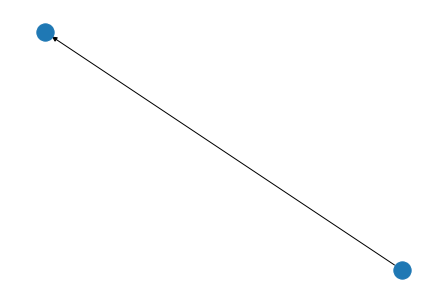

In [ ]:
import matplotlib.pyplot as plt 
np.random.seed(0)
nx.draw(G)
plt.show()

Our plotted graph could clearly use some improvement. First of all, we need to make our arrow bigger. Also, we will benefit by adding labels to the nodes. 

**Listing 18. 14. Tweaking the graph visulization**

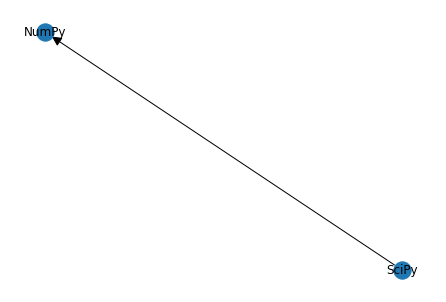

In [ ]:
np.random.seed(0)
labels = {i: G.nodes[i]['webpage'] for i in G.nodes}
nx.draw(G, labels=labels, arrowsize=20)
plt.show()

The arrow is now bigger, and the node labels now partially visible. Unfortunately, these labels are obscured by the dark node color. However, we can make the labels more visible by changing the node color to something lighter, like cyan.

**Listing 18. 15.  Altering the node color**

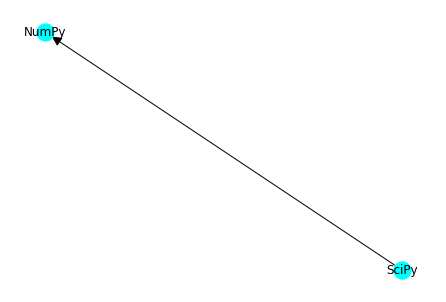

In [ ]:
np.random.seed(0)
nx.draw(G, labels=labels, node_color="cyan", arrowsize=20)
plt.show()

Within our latest plot, the labels are much more clearly visible. We see the directed link from _SciPy_ to _NumPy_. Now, lets add a reverse web-link from _NumPy_ to _SciPy_ in order to stay consistent with our earlier discussion.

**Listing 18. 16. Adding a back-link between webpages**

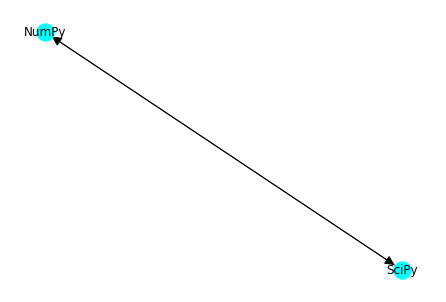

In [ ]:
np.random.seed(0)
G.add_edge(0, 1)
nx.draw(G, labels=labels, node_color="cyan", arrowsize=20)
plt.show()

We are now ready to expand our network by adding two more webpages; _Pandas_ and _Matplotlib_. These webpages will correspond to nodes containing ids 2 and 3, respectively.

**Listing 18. 17. Adding multiple nodes to a graph object** 

In [ ]:
webpages = ['Pandas', 'Matplotlib']
new_nodes = [(i, {'webpage': webpage})
             for i, webpage in enumerate(webpages, 2)]
G.add_nodes_from(new_nodes)

print(f"We've added these nodes to our graph:\n{new_nodes}")
print('\nOur updated list of nodes is:')
print(G.nodes(data=True))

We've added these nodes to our graph:
[(2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]

Our updated list of nodes is:
[(0, {'webpage': 'NumPy'}), (1, {'webpage': 'SciPy'}), (2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]


We've added the two more nodes. Lets visualize the updated graph.

**Listing 18. 18. Plotting the updated 4-node graph**

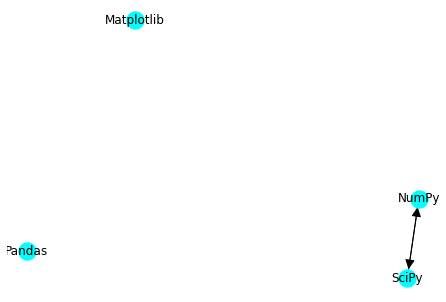

In [ ]:
np.random.seed(0)
labels = {i: G.nodes[i]['webpage'] for i in G.nodes}
nx.draw(G, labels=labels, node_color="cyan", arrowsize=20)
plt.show()

Our current web-link network is disconnected. We'll proceed to add two more web-links.

**Listing 18. 19. Adding multiple edges to a graph object** 

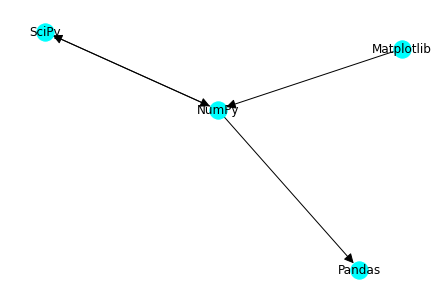

In [ ]:
np.random.seed(1)
G.add_edges_from([(0, 2), (3, 0)])
nx.draw(G, labels=labels, node_color="cyan", arrowsize=20)
plt.show()

We can infer that _NumPy_ is our most popular site, since it has more inbound links than any other page. We've basically developed a simple metric for ranking websites on the internet. That metric equals the number of inbound edges pointing towards the site, also known as the **in-degree**. We can also compute the in-degree directly from the graph's adjacency matrix. In order to demonstrate how, we'll first print-out our updated adjacency matrix.

**Listing 18. 20. Printing the updated adjacency matrix**

In [ ]:
adjacency_matrix = nx.to_numpy_array(G)
print(adjacency_matrix)

[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]


The ith column in the matrix tracks the inbound edges of node `i`. The total number of inbound edges equals the number of non-zero ones within that column. Therefore, the sum of values in the column is equal to the node's in-degree. In general, executing `adjacency_matrix.sum(axis=0)` will return a vector of in-degrees. That vector's largest element will correspond to the most popular page in our Internet graph.

**Listing 18. 21. Computing in-degrees using the adjacency matrix** 

In [ ]:
in_degrees = adjacency_matrix.sum(axis=0)
for i, in_degree in enumerate(in_degrees):
    page = G.nodes[i]['webpage']
    print(f"{page} has an in-degree of {in_degree}")

top_page = G.nodes[in_degrees.argmax()]['webpage']
print(f"\n{top_page} is the most popular page.")

NumPy has an in-degree of 2.0
SciPy has an in-degree of 1.0
Pandas has an in-degree of 1.0
Matplotlib has an in-degree of 0.0

NumPy is the most popular page.


Alternatively, we can compute all in-degrees using the NetworkX `in_degree` method.

**Listing 18. 22. Computing in-degrees using NetworkX**

In [ ]:
assert G.in_degree(0) == 2

Tracking the mapping between node ids and page-names can be slightly inconvenient. However, we can bypass that inconvenience by assigning string ids to individual nodes.

**Listing 18. 23. Using strings as node-ids within a graph**

In [ ]:
G2 = nx.DiGraph()
G2.add_nodes_from(['NumPy', 'SciPy', 'Matplotlib', 'Pandas'])
G2.add_edges_from([('SciPy', 'NumPy'), ('SciPy', 'NumPy'),
                   ('NumPy', 'Pandas'), ('Matplotlib', 'NumPy')])
assert G2.in_degree('NumPy') == 2

---

In [ ]:
!pip install -q watermark
%reload_ext watermark
%watermark -a "Sparsh A." -m -iv -u -t -d

Author: Sparsh A.

Last updated: 2021-11-21 15:05:52

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.104+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

matplotlib: 3.2.2
numpy     : 1.19.5
IPython   : 5.5.0
networkx  : 2.6.3



---